In [41]:
import os
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")
from sklearn.cluster import KMeans
import networkx as nx
import numpy as np
from graph_generation.load_graphs_and_create_metadata import dataset_metadata
from graph_matching_tools.metrics import matching
import matplotlib.pyplot as plt
import scipy.io as sco
import slam.io as sio
import pickle
from scipy.stats import betabinom
import seaborn as sns
import tools.graph_processing as gp
import tools.graph_visu as gv
from matplotlib.pyplot import figure
%matplotlib inline

In [42]:
path_to_dummy_graph_folder = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/NEW_SIMUS_JULY_11/'

In [43]:
path_to_labelled_graphs = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/Oasis_original_new_with_dummy/labelled_graphs/'

In [44]:
def graph_remove_dummy_nodes(graph):
    nodes_dummy_true = [x for x,y in graph.nodes(data=True) if y['is_dummy']==True]
    graph.remove_nodes_from(nodes_dummy_true)
    #print(len(graph.nodes))

In [45]:
def label_nodes_according_to_coord(graph_no_dummy, template_mesh, coord_dim=1):
    nodes_coords = gp.graph_nodes_to_coords(graph_no_dummy, 'ico100_7_vertex_index', template_mesh)

    one_nodes_coords = nodes_coords[:, coord_dim]
    one_nodes_coords_scaled = (one_nodes_coords - np.min(one_nodes_coords))/(np.max(one_nodes_coords)-np.min(one_nodes_coords))

    #one_nodes_coords_scaled = np.random.rand(len(nodes_coords))
    # initialise the dict for atttributes
    nodes_attributes = {}
    # Fill the dictionnary with the nd_array attribute
    for ind, node in enumerate(graph_no_dummy.nodes):
        nodes_attributes[node] = {"label_color": one_nodes_coords_scaled[ind]}

    nx.set_node_attributes(graph_no_dummy, nodes_attributes)
    return one_nodes_coords_scaled

In [46]:
def mean_depth(G):
    all_depth = [depth for node,depth in list(G.nodes.data('depth'))]
    #mean_geo = np.array(all_geo).mean()
    #std = np.std(all_geo)
    return all_depth

In [47]:
list_graphs = gp.load_graphs_in_list(path_to_labelled_graphs)

In [48]:
#list_graphs[0].nodes.data()[0]

In [49]:
# Average depth

all_pairwise_depth = []

for g in list_graphs:
    g.remove_edges_from(nx.selfloop_edges(g))
    graph_pairwise_depth = []
    
    for u,v in g.edges:
        if g.nodes.data()[u]['is_dummy'] == False and g.nodes.data()[v]['is_dummy'] == False:
            depth_u = g.nodes()[u]["depth"]
            depth_v = g.nodes()[v]["depth"]
            pairwise_depth = np.average([depth_u,depth_v])
            
            graph_pairwise_depth.append(pairwise_depth)
            
    all_pairwise_depth.append(graph_pairwise_depth)

In [50]:
# Average area

all_pairwise_area = []

for g in list_graphs:
    g.remove_edges_from(nx.selfloop_edges(g))
    graph_pairwise_area = []
    
    for u,v in g.edges:
        if g.nodes.data()[u]['is_dummy'] == False and g.nodes.data()[v]['is_dummy'] == False:
            area_u = g.nodes()[u]["basin_area"]
            area_v = g.nodes()[v]["basin_area"]
            pairwise_area = np.average([area_u,area_v])
            
            graph_pairwise_area.append(pairwise_area)
            
    all_pairwise_area.append(graph_pairwise_area)

In [51]:
all_geo_dist = []

for g in list_graphs:
    g.remove_edges_from(nx.selfloop_edges(g))
    all_geo_dist.append(list(nx.get_edge_attributes(g,'geodesic_distance').values()))

In [52]:
flat_avg_depths = [item for sublist in all_pairwise_depth for item in sublist]
flat_all_geo   = [item for sublist in all_geo_dist for item in sublist]
flat_all_area   = [item for sublist in all_pairwise_area for item in sublist]

Text(0, 0.5, 'geo distance between two nodes')

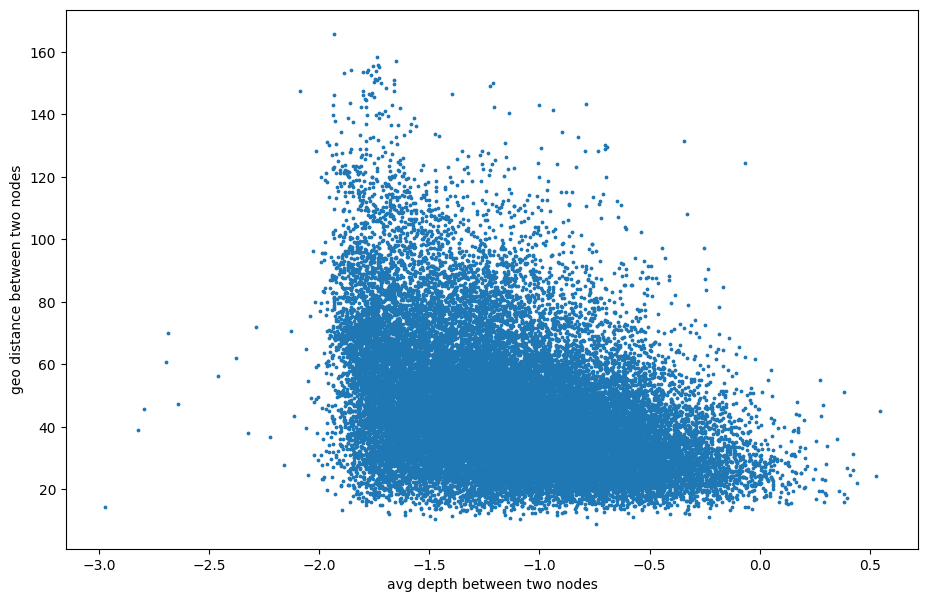

In [53]:
figure(figsize=(11, 7),dpi = 100)
plt.scatter(flat_avg_depths,flat_all_geo,s=3)
plt.xlabel('avg depth between two nodes')
plt.ylabel('geo distance between two nodes')

Text(0, 0.5, 'geo distance between two nodes')

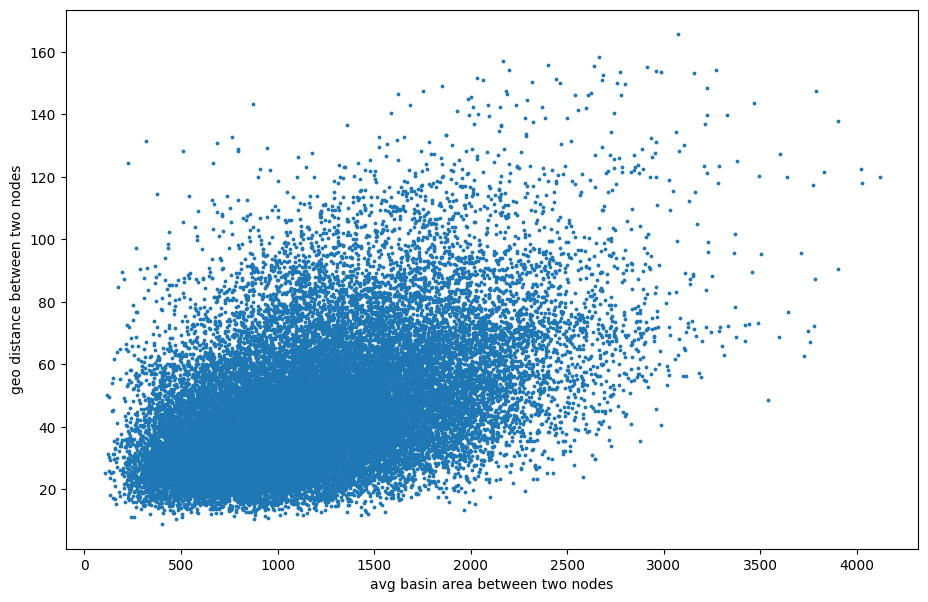

In [54]:
figure(figsize=(11, 7),dpi = 100)
plt.scatter(flat_all_area,flat_all_geo,s=3)
plt.xlabel('avg basin area between two nodes')
plt.ylabel('geo distance between two nodes')

Text(0, 0.5, 'avg basin area bween two nodes')

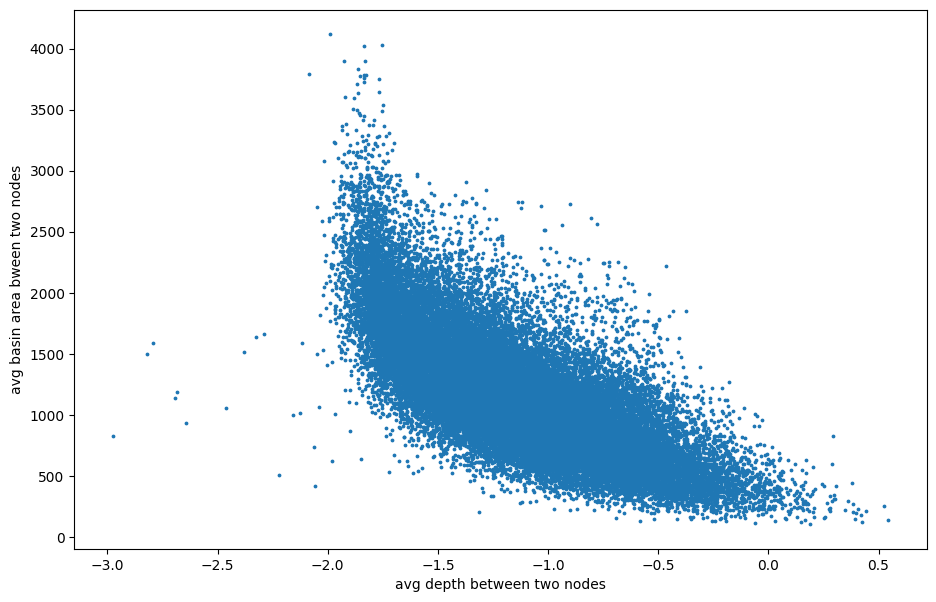

In [56]:
figure(figsize=(11, 7),dpi = 100)
plt.scatter(flat_avg_depths,flat_all_area,s=3)
plt.xlabel('avg depth between two nodes')
plt.ylabel('avg basin area bween two nodes')

In [57]:
all_depths = []
for g in list_graphs:
    graph_remove_dummy_nodes(g)
    all_depths.append(mean_depth(g))

In [58]:
flat_list_depths = [item for sublist in all_depths for item in sublist]

Text(0.5, 9.444444444444438, 'depth')

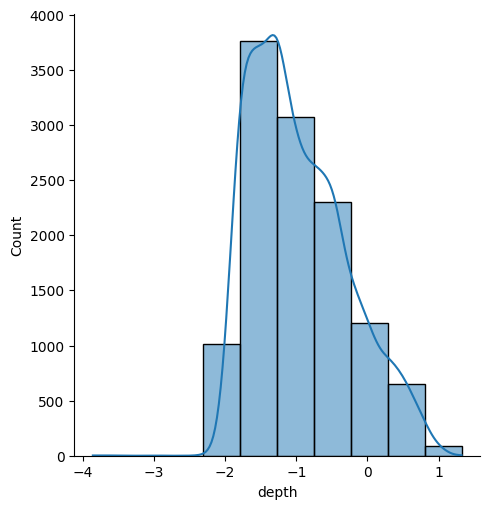

In [61]:
import seaborn as sns
sns.displot(flat_list_depths, bins=10, kde=True);
plt.xlabel("depth")

In [38]:
basin_area_all = []
depth_all = []
for g in list_graphs:
    basin_area_all.append(list(nx.get_node_attributes(g,'basin_area').values()))
    depth_all.append(list(nx.get_node_attributes(g,'depth').values()))
    
depth_flattened = [item for sublist in depth_all for item in sublist]
basin_area_flattened = [item for sublist in basin_area_all for item in sublist]

Text(0, 0.5, 'basin area')

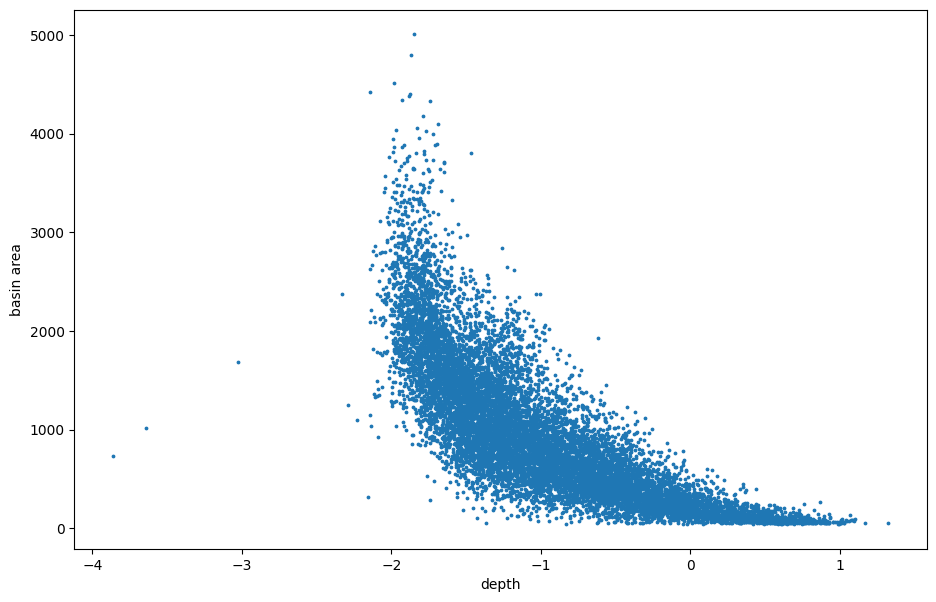

In [39]:
figure(figsize=(11, 7),dpi = 100)
plt.scatter(depth_flattened,basin_area_flattened,s=3)
plt.xlabel('depth')
plt.ylabel('basin area')

In [65]:
# g.nodes.data()[0]

In [ ]:
all_labels = []
for g in list_graphs:
    labels_mals = list(nx.get_node_attributes(g,'labelling_mALS').values())
    all_labels.append(labels_mals)

In [ ]:
#all_labels[22]

In [ ]:
list_graphs[22].nodes.data()[7]

In [ ]:
a = np.random.randint(2, size=(5, 5))
a

In [ ]:
flat_list = [item for sublist in all_labels for item in sublist]

In [ ]:
np.unique(np.array(flat_list), return_counts=True)

In [ ]:
np.count_nonzero(np.array(flat_list) == -1)

In [ ]:
5191/len(flat_list)

In [ ]:
# nx.get_node_attributes(list_graphs[22],'label_media')

In [ ]:
list(nx.get_node_attributes(list_graphs[22],'labelling_mALS').values()).count(-1.0)

In [ ]:
r_perm = pickle.load(open("../data/r_perm_22.gpickle","rb"))

In [ ]:
template_mesh = '../data/template_mesh/OASIS_avg.lh.white.talairach.reg.ico7.inflated.gii'#lh.OASIS_testGrp_average_inflated.gii'
mesh = gv.reg_mesh(sio.load_mesh(template_mesh))

color_label_ordered = label_nodes_according_to_coord(list_graphs[22], mesh, coord_dim=0)

path_to_X = "../data/Oasis_original_new_with_dummy/X_"+'mALS'+".mat"

In [ ]:
color_label =  color_label_ordered[r_perm]

In [ ]:
X = sco.loadmat(path_to_X)['X']

In [ ]:
row_scope = range(22 * 101, (22 + 1) * 101)
col_scope = range(22 * 101, (22 + 1) * 101)

perm_X = np.array(X[np.ix_(row_scope, col_scope)], dtype=int)

In [ ]:
transfered_labels = np.ones(101)*-1.0

In [ ]:
for node_indx,ind in enumerate(row_scope):
    match_index = np.where(perm_X[node_indx,:]==1)[0]

    if len(match_index)>0:
        transfered_labels[match_index[0]] = color_label[node_indx]

In [ ]:
transfered_labels

In [ ]:
# all_perc = []
# for labels in all_labels:
#     perc_lab = labels.count(-1.0)/101
#     all_perc.append(perc_lab)

In [ ]:
for g in list_graphs:
    nodes_to_remove = gp.remove_dummy_nodes(g)
    nodes_to_remove = np.where(np.array(nodes_to_remove)==False)
    g.remove_nodes_from(list(nodes_to_remove[0]))

In [ ]:
all_labels = []
for g in list_graphs:
    labels_mals = list(nx.get_node_attributes(g,'labelling_mALS').values())
    all_labels.append(labels_mals)

In [ ]:
flat_list = [item for sublist in all_labels for item in sublist]

In [ ]:
np.count_nonzero(np.array(flat_list) == -1)/len(flat_list)

In [157]:
a1 = np.array([1,2,3])
a2 = np.array([4,5,6])

In [162]:
np.concatenate((a1, a2), axis=0)

array([1, 2, 3, 4, 5, 6])